In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Halogénio riscas

In [2]:
import os
import csv

# Folder containing your .txt files
INPUT_FOLDER = "DF"
OUTPUT_FOLDER = "DF_csv"

# Create output folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith(".sample"):
        input_path = os.path.join(INPUT_FOLDER, filename)
        output_path = os.path.join(OUTPUT_FOLDER, filename.replace(".sample", ".csv"))

        with open(input_path, "r", encoding="utf-8", errors="ignore") as infile:
            lines = infile.readlines()

        # Find where the measurement data starts
        data_start = None
        for i, line in enumerate(lines):
            if line.strip().startswith("--- Measurement Data ---"):
                data_start = i + 1
                break

        if data_start is None:
            print(f"⚠️ No data section found in {filename}")
            continue

        # Read data lines until a blank line or end of file
        data = []
        for line in lines[data_start:]:
            if not line.strip():
                break
            parts = line.split()
            if len(parts) >= 3:
                pixel, wavelength, intensity = parts[:3]
                data.append([pixel, wavelength, intensity])

        # Write to CSV
        with open(output_path, "w", newline="", encoding="utf-8") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["Pixel", "Wavelength (nm)", "Intensity (a.u.)"])
            writer.writerows(data)

        print(f"✅ Converted: {filename} → {output_path}")

print("\nAll conversions complete!")


✅ Converted: haloFverde.sample → DF_csv/haloFverde.csv
✅ Converted: haloFtrans.sample → DF_csv/haloFtrans.csv
✅ Converted: haloFgre.sample → DF_csv/haloFgre.csv
✅ Converted: haloFlaranja.sample → DF_csv/haloFlaranja.csv
✅ Converted: haloSF.sample → DF_csv/haloSF.csv

All conversions complete!


# Fluorescência

In [3]:
import os
import pandas as pd

input_folder = "DF"
output_folder = "DF_csv1"

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(".txt"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".csv")

        with open(input_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.readlines()

        # Find where data starts
        start_idx = None
        header = None
        for i, line in enumerate(lines):
            if line.strip().startswith("time"):
                header = line.strip().split()
                start_idx = i + 1
                break

        if start_idx is None:
            print(f"⚠️ Skipping {filename}: no 'time' header found.")
            continue

        # Read data lines only
        data = [line.strip().split() for line in lines[start_idx:] if line.strip()]

        # Ensure all rows have the same number of columns
        max_cols = max(len(row) for row in data)
        data = [row + [""] * (max_cols - len(row)) for row in data]  # pad shorter rows

        # If header doesn't match data width, fix it
        if len(header) != max_cols:
            header = header[:max_cols] + [f"col_{i}" for i in range(len(header), max_cols)]

        # Create dataframe
        df = pd.DataFrame(data, columns=header)

        # Convert numeric columns
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="ignore")

        # Save as CSV
        df.to_csv(output_path, index=False)
        print(f"✅ Converted: {filename} → {output_path}")

print("\n🎉 All conversions complete.")


✅ Converted: fluo3.txt → DF_csv1/fluo3.csv
✅ Converted: fluo7.txt → DF_csv1/fluo7.csv
✅ Converted: fluo5.txt → DF_csv1/fluo5.csv
✅ Converted: fluo4.txt → DF_csv1/fluo4.csv
✅ Converted: fluo8.txt → DF_csv1/fluo8.csv
✅ Converted: fluo15.txt → DF_csv1/fluo15.csv
✅ Converted: fluo11.txt → DF_csv1/fluo11.csv
✅ Converted: fluo10.txt → DF_csv1/fluo10.csv
✅ Converted: fluo9.txt → DF_csv1/fluo9.csv


/tmp/ipykernel_19489/1188693221.py:46: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Converted: fluo13.txt → DF_csv1/fluo13.csv
✅ Converted: fluo12.txt → DF_csv1/fluo12.csv
✅ Converted: fluo2.txt → DF_csv1/fluo2.csv
✅ Converted: fluo14.txt → DF_csv1/fluo14.csv
✅ Converted: fluo1.txt → DF_csv1/fluo1.csv
✅ Converted: fluo6.txt → DF_csv1/fluo6.csv

🎉 All conversions complete.


# Halogénio

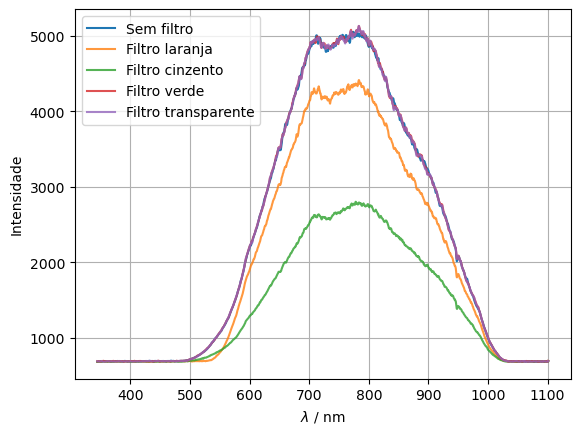

In [4]:
haloSF = pd.read_csv('DF_csv/haloSF.csv')
orange = pd.read_csv('DF_csv/haloFlaranja.csv')
grey = pd.read_csv('DF_csv/haloFgre.csv')
green = pd.read_csv('DF_csv/haloFverde.csv')
transp = pd.read_csv('DF_csv/haloFtrans.csv')

colors= [orange, grey, green, transp]
labels = ['Filtro laranja', 'Filtro cinzento', 'Filtro verde', 'Filtro transparente']



x = np.array(haloSF['Wavelength (nm)'][1:]).astype(float)
y = np.array(haloSF['Intensity (a.u.)'][1:]).astype(float)
plt.plot(x,y, label = 'Sem filtro',alpha=1)
for i in range(len(colors)): 
    x = np.array(colors[i]['Wavelength (nm)'][1:]).astype(float)
    y = np.array(colors[i]['Intensity (a.u.)'][1:]).astype(float)
    plt.plot(x,y, label = f'{labels[i]}', alpha=0.8)

plt.xlabel(r'$\lambda$ / nm')
plt.ylabel('Intensidade')
plt.legend()
plt.grid()
plt.show()

### Transmitâncias

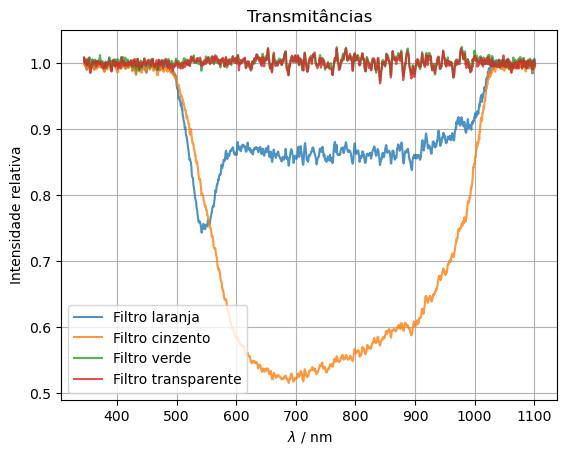

In [5]:
plt.title('Transmitâncias')
x0 = np.array(haloSF['Wavelength (nm)'][1:]).astype(float)
y0 = np.array(haloSF['Intensity (a.u.)'][1:]).astype(float)
#plt.plot(x,y, label = 'Sem filtro',alpha=1)
for i in range(len(colors)): 
    x = np.array(colors[i]['Wavelength (nm)'][1:]).astype(float)
    y = np.array(colors[i]['Intensity (a.u.)'][1:]).astype(float)
    plt.plot(x,y/y0, label = f'{labels[i]}', alpha=0.8)

plt.xlabel(r'$\lambda$ / nm')
plt.ylabel('Intensidade relativa')
plt.legend(loc='lower left')
plt.grid()
plt.show()

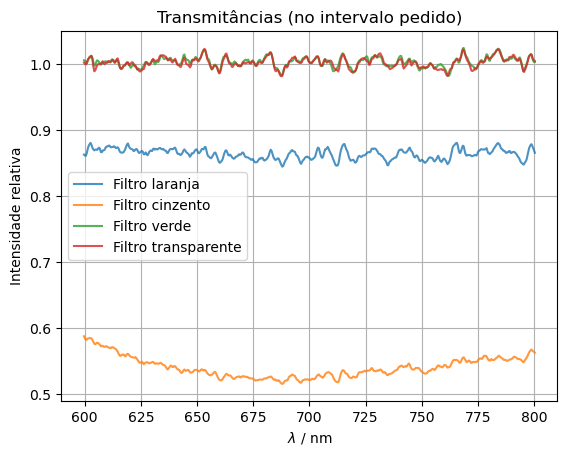

In [6]:
plt.title('Transmitâncias (no intervalo pedido)')
x0 = np.array(haloSF['Wavelength (nm)'][1:]).astype(float)
y0 = np.array(haloSF['Intensity (a.u.)'][1:]).astype(float)
#plt.plot(x,y, label = 'Sem filtro',alpha=1)
for i in range(len(colors)): 
    x = np.array(colors[i]['Wavelength (nm)'][1:]).astype(float)
    y = np.array(colors[i]['Intensity (a.u.)'][1:]).astype(float)
    plt.plot(x[575:1085],y[575:1085]/y0[575:1085], label = f'{labels[i]}', alpha=0.8)

plt.xlabel(r'$\lambda$ / nm')
plt.ylabel('Intensidade relativa')
plt.legend(loc='center left')
plt.grid()
plt.show()

## Fluorescência

In [140]:
def exp_fit(t, V0, tau, a):
    return V0+a*np.exp(t/(-tau))

In [118]:
fluosDF = [ [[],[]] for i in range(15)]
fluos = [ [] for i in range(15)] 
params = [ [] for i in range(15)]
mcs = [ [] for i in range(15)]
maxs = [ [] for i in range(15)]
        
for i in range(15):
    fluos[i] = pd.read_csv(f"DF_csv1/fluo{i+1}.csv")
    N = len(fluos[i]["Y[0]"])
    fluosDF[i][0] = [ float(fluos[i]["Y[0]"][j][6:]) for j in range(N) ]
    fluosDF[i][1] = fluos[i]["col_2"]
    maxs[i] = fluosDF[i][1].idxmax()


In [149]:
params

[array([5.71944965e-01, 4.42916220e-03, 4.45523907e+06]),
 array([5.71801686e-01, 4.48418005e-03, 5.16061934e+06]),
 array([5.71711120e-01, 4.48356886e-03, 3.28400707e+06]),
 array([5.71466643e-01, 4.60495192e-03, 1.44660438e+06]),
 array([5.70691673e-01, 4.61659828e-03, 3.83301399e+03]),
 array([5.69983143e-01, 4.98783367e-03, 1.77380782e+03]),
 array([5.72142181e-01, 4.35434462e-03, 1.00148732e+04]),
 array([5.71126595e-01, 4.65397153e-03, 3.21568996e+03]),
 array([5.71997294e-01, 4.38536846e-03, 8.24027530e+03]),
 array([5.71493497e-01, 4.46641923e-03, 5.71009268e+03]),
 array([5.71305289e-01, 4.66917983e-03, 3.61141566e+03]),
 array([5.71802401e-01, 4.41427036e-03, 9.13760086e+03]),
 array([5.72510451e-01, 4.09989155e-03, 1.94650106e+04]),
 array([5.71648315e-01, 4.44225723e-03, 6.80212442e+03]),
 array([5.71514757e-01, 4.71340538e-03, 3.58087673e+03])]

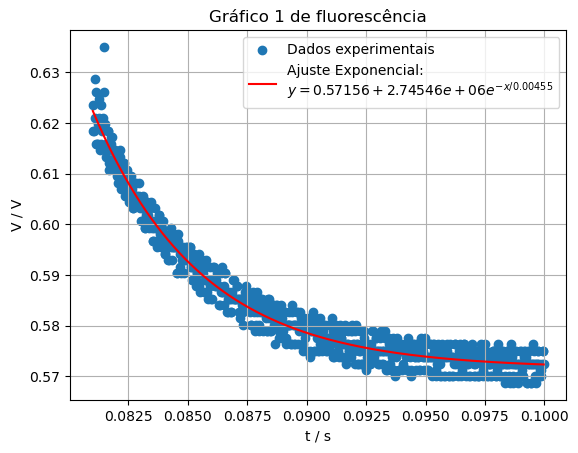

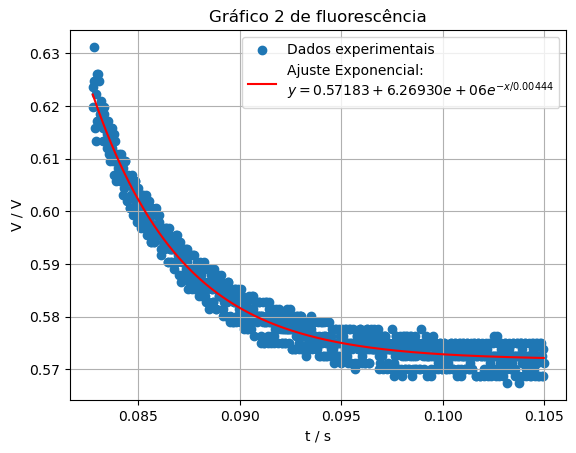

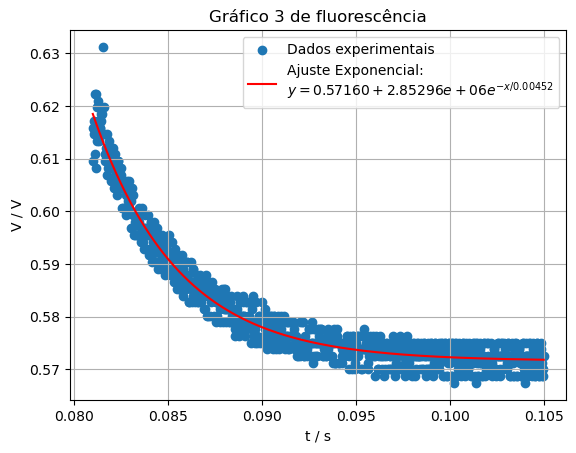

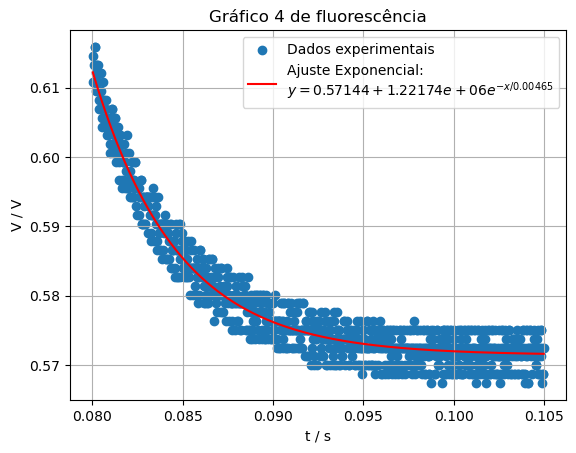

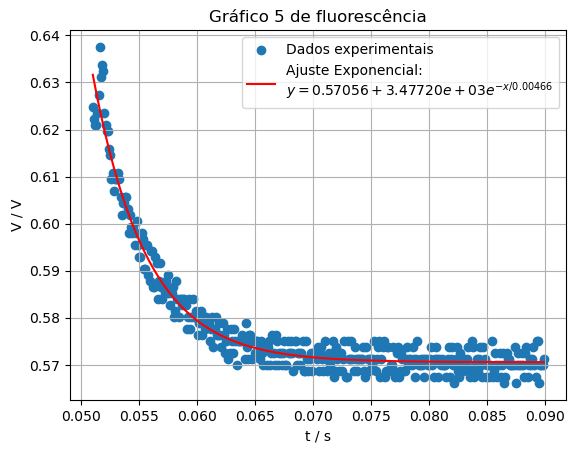

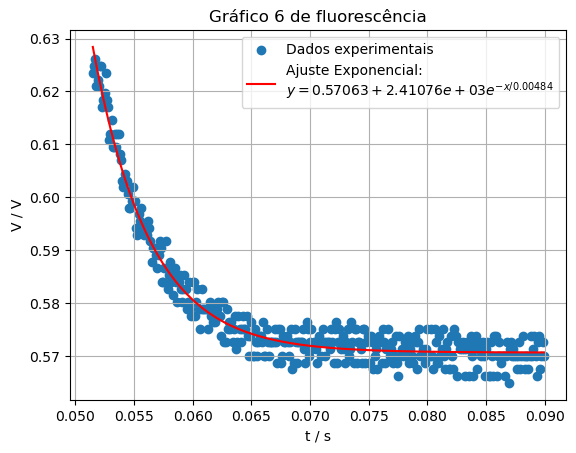

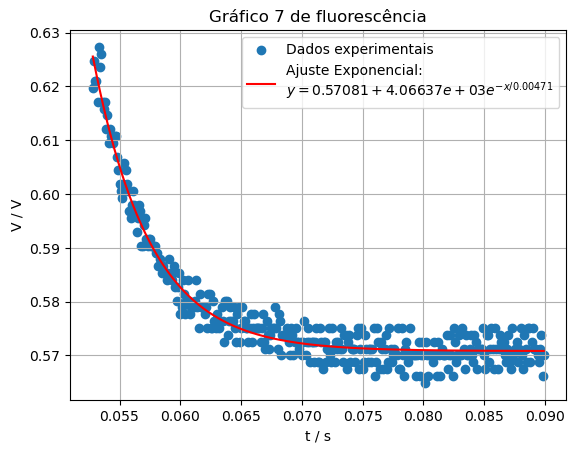

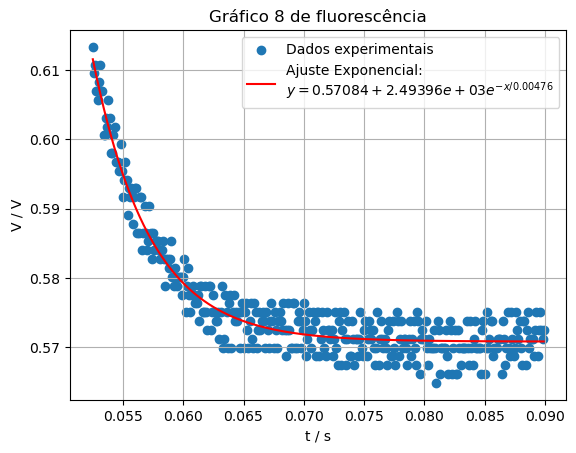

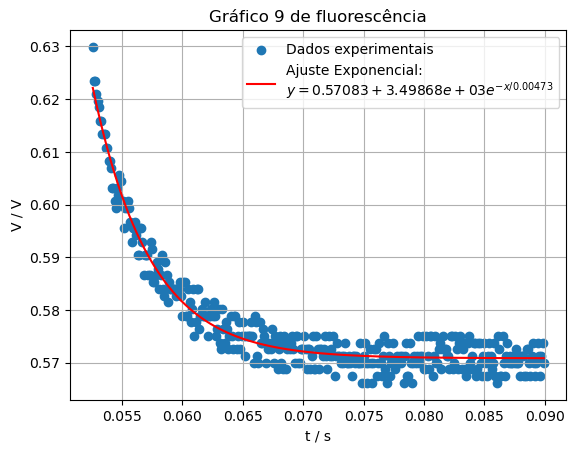

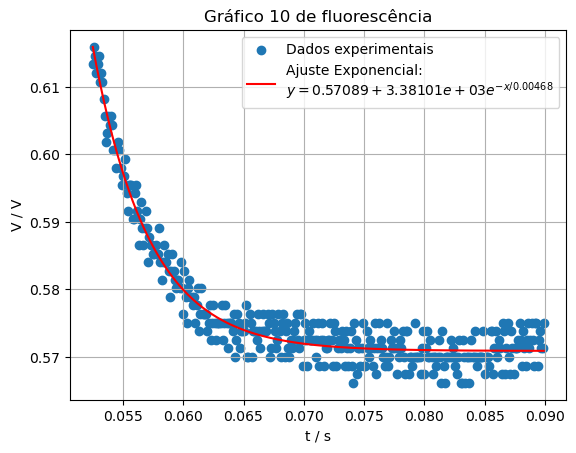

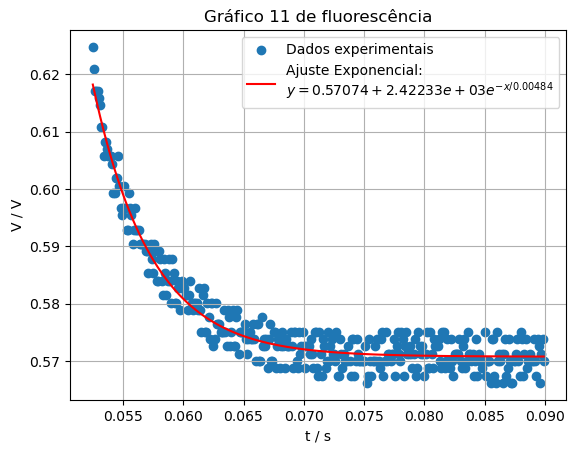

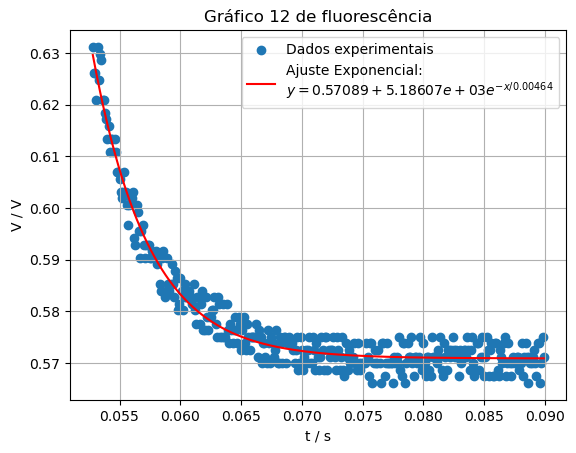

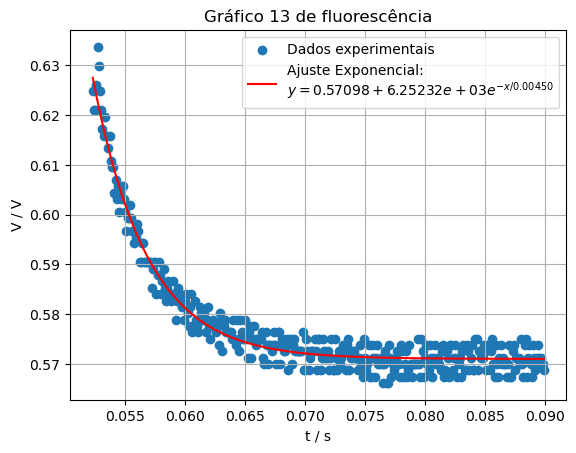

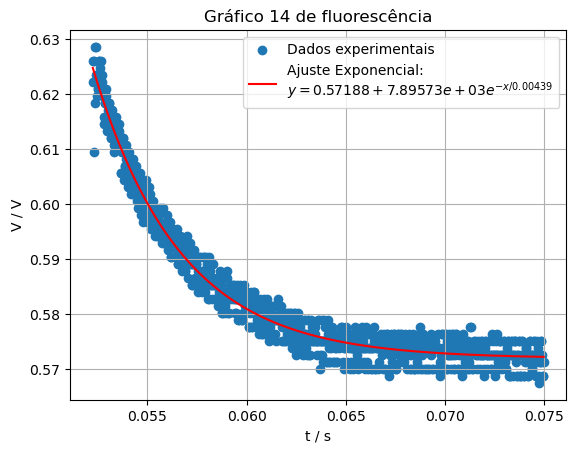

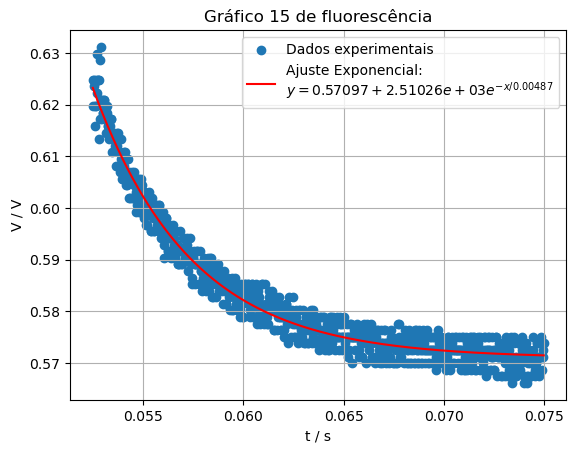

In [170]:
start_index = np.array([3240, 3310, 3240, 3201, 510, 515, 528, 525, 526, 525, 525, 528, 523, 2090, 2100], dtype = int)
end_index =   np.array([3800, 4000, 4000, 4000, 700, 700, 700, 700, 700, 700, 700, 700, 700, 2800, 2800], dtype = int) + 200

for i in range(15):
    params[i], mcs[i] = curve_fit(exp_fit, fluosDF[i][0][start_index[i]:end_index[i]], fluosDF[i][1][start_index[i]:end_index[i]], [0.575, 0.01, 1])

    plt.scatter(fluosDF[i][0][start_index[i]:end_index[i]], fluosDF[i][1][start_index[i]:end_index[i]], label = "Dados experimentais")

    plt.plot(fluosDF[i][0][start_index[i]:end_index[i]], exp_fit(fluosDF[i][0][start_index[i]:end_index[i]], params[i][0], params[i][1], params[i][2]),
            color = "r", label = "Ajuste Exponencial:" +"\n" fr"$y = {params[i][0]:.5f} + {params[i][2]:.5e} e^{{-x/{params[i][1]:.5f}}}$")
    
    plt.title(f"Gráfico {i+1} de fluorescência")
    plt.xlabel("t / s")
    plt.ylabel("V / V")
    plt.grid()
    plt.legend()
    plt.show()

In [198]:
for i in range(15):
    print(params[i][1], ":", np.sqrt(mcs[i][1,1])*3)

0.004549257577915298 : 0.00023382356015695508
0.0044391439055528475 : 0.0001948931604825867
0.004518986845984898 : 0.00020524360313181687
0.004648425839441338 : 0.00023118967391113314
0.004657699413912097 : 0.0003023405823047177
0.004840942616037217 : 0.0002996523698775945
0.004707844896458889 : 0.0003183492306557133
0.004762789853519089 : 0.0004198069734034054
0.004725884443292483 : 0.00034440650970857695
0.004676343283920795 : 0.00034936037670260244
0.004843320458998541 : 0.0003732487896856354
0.004636103699905959 : 0.0002984025853060184
0.004503275416090368 : 0.0002926058099914534
0.0043859231595452285 : 0.00018250207146300573
0.004870461230615055 : 0.00021196301297546555


### Algumas Estatísticas

In [254]:
#tau médio:
tau_med = 0
#media do desvio padrao
desv_tau_med = 0
for i in range(15):
    tau_med += params[i][1]
    desv_tau_med = np.sqrt(mcs[i][1,1])*3
tau_med = tau_med/15
desv_tau_med = desv_tau_med/15

#desvio padrao da media:
desv_pad_med = 0
for i in range(15):
    desv_pad_med += (params[i][1] - tau_med)**2
desv_pad_med = np.sqrt(1/(15+1) * desv_pad_med)
tau_mean, desv_pad_med

(np.float64(0.004651093509412674), np.float64(0.00013879625866072162))

In [244]:
params[0]

array([5.71560035e-01, 4.54925758e-03, 2.74546305e+06])